In [177]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy as pearsonr
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error

In [178]:
data= pd .read_csv('heart_failure_clinical_records_dataset.csv.xls')

In [179]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [180]:
data.shape

(299, 13)

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [182]:
data.isna().sum()# there aren't missing value in our data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [183]:
# Count of duplicates values and removing duplicates
data.drop_duplicates()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [184]:
#Drop the rows where at least one element is missing.
data.dropna()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [185]:
# Getting the min, max, Q1 and Q2 
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [186]:
data1 = data.copy()
data1

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [187]:
x=data.drop("DEATH_EVENT",axis=1)
y=data["DEATH_EVENT"]

In [188]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

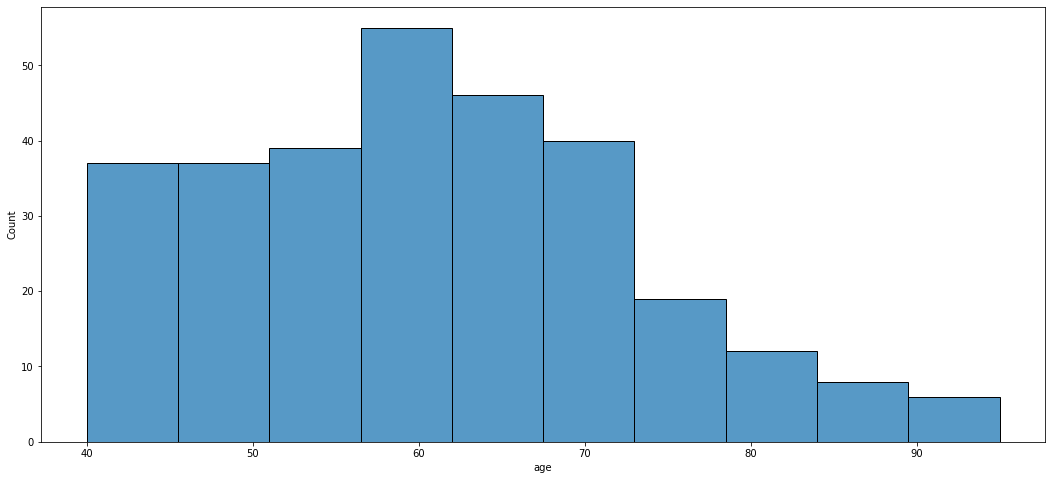

In [189]:
plt.figure(figsize=(18,8))
sns.histplot(data=data,x='age',palette='chinstrap')
plt.show()

this histogram show us that the frequent age is 60 YO and the merge between 60and 75 are the most have the heart-failure

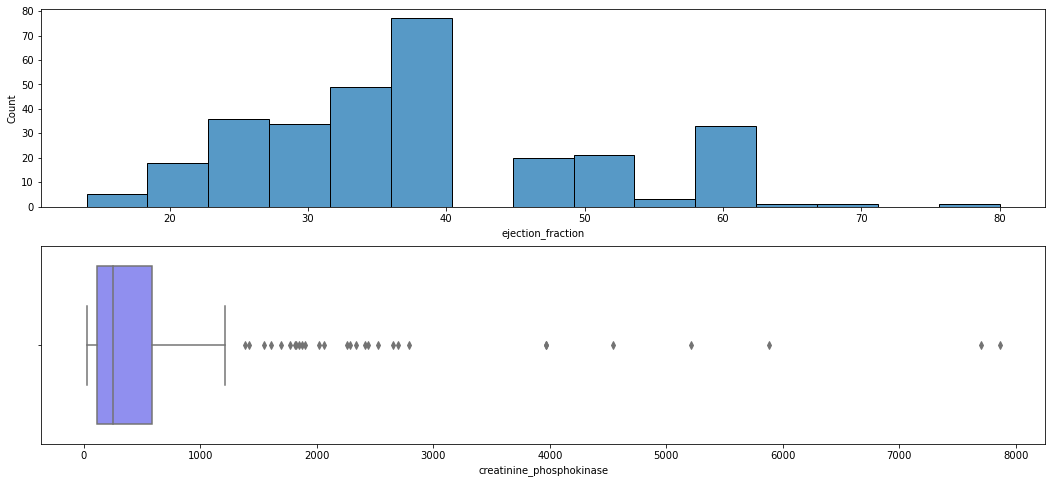

In [190]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.histplot(data=data,x='ejection_fraction',palette='cool',ax=axes[0])
sns.boxplot(data=data,x='creatinine_phosphokinase',palette='cool',ax=axes[1])
plt.show()

the histogram show us that the most frequent value of Percentage of blood leaving is around 35 the boxplot show us that there are outliers and the quantile of order 800 Level of the CPK enzyme in the blood.

In [191]:
data['creatinine_phosphokinase'].median()

250.0

In [192]:
data['creatinine_phosphokinase'].mean()# is affect by the outliers 

581.8394648829432

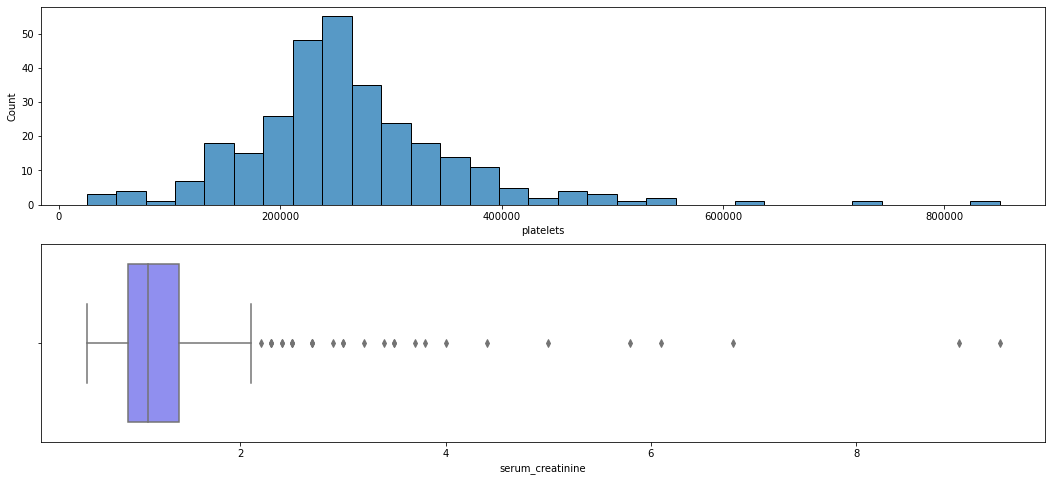

In [193]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.histplot(data=data,x='platelets',palette='cool',ax=axes[0])
sns.boxplot(data=data,x='serum_creatinine',palette='cool',ax=axes[1])
plt.show()

categorical features

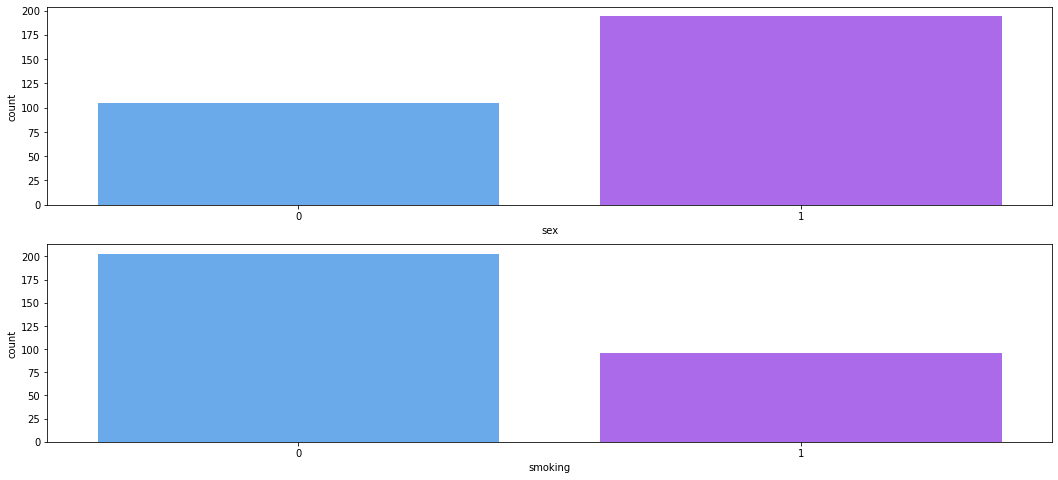

In [194]:
fig , axes=plt.subplots(ncols=1 , nrows=2, figsize=(18,8))
sns.countplot(data=data,x='sex',palette='cool',ax=axes[0])
sns.countplot(data=data,x='smoking',palette='cool',ax=axes[1])
plt.show()

the first graph show that the most patient have heart-failure are male

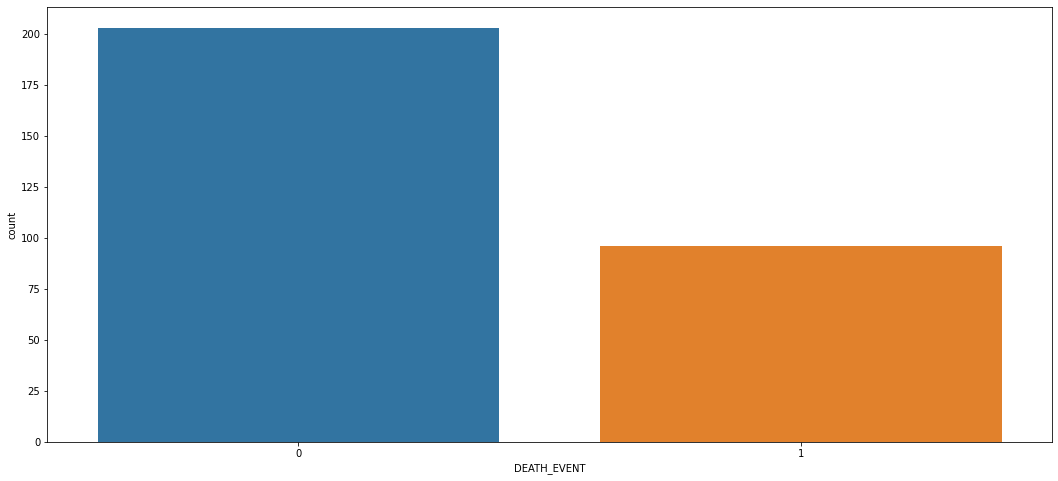

In [195]:
plt.figure(figsize=(18,8))
sns.countplot(data=data,x='DEATH_EVENT')
plt.show()

<AxesSubplot:>

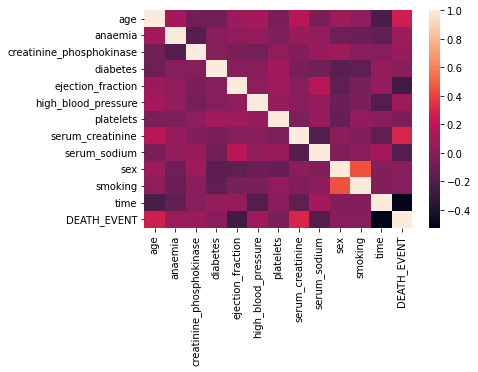

In [196]:
sns.heatmap(data.corr())

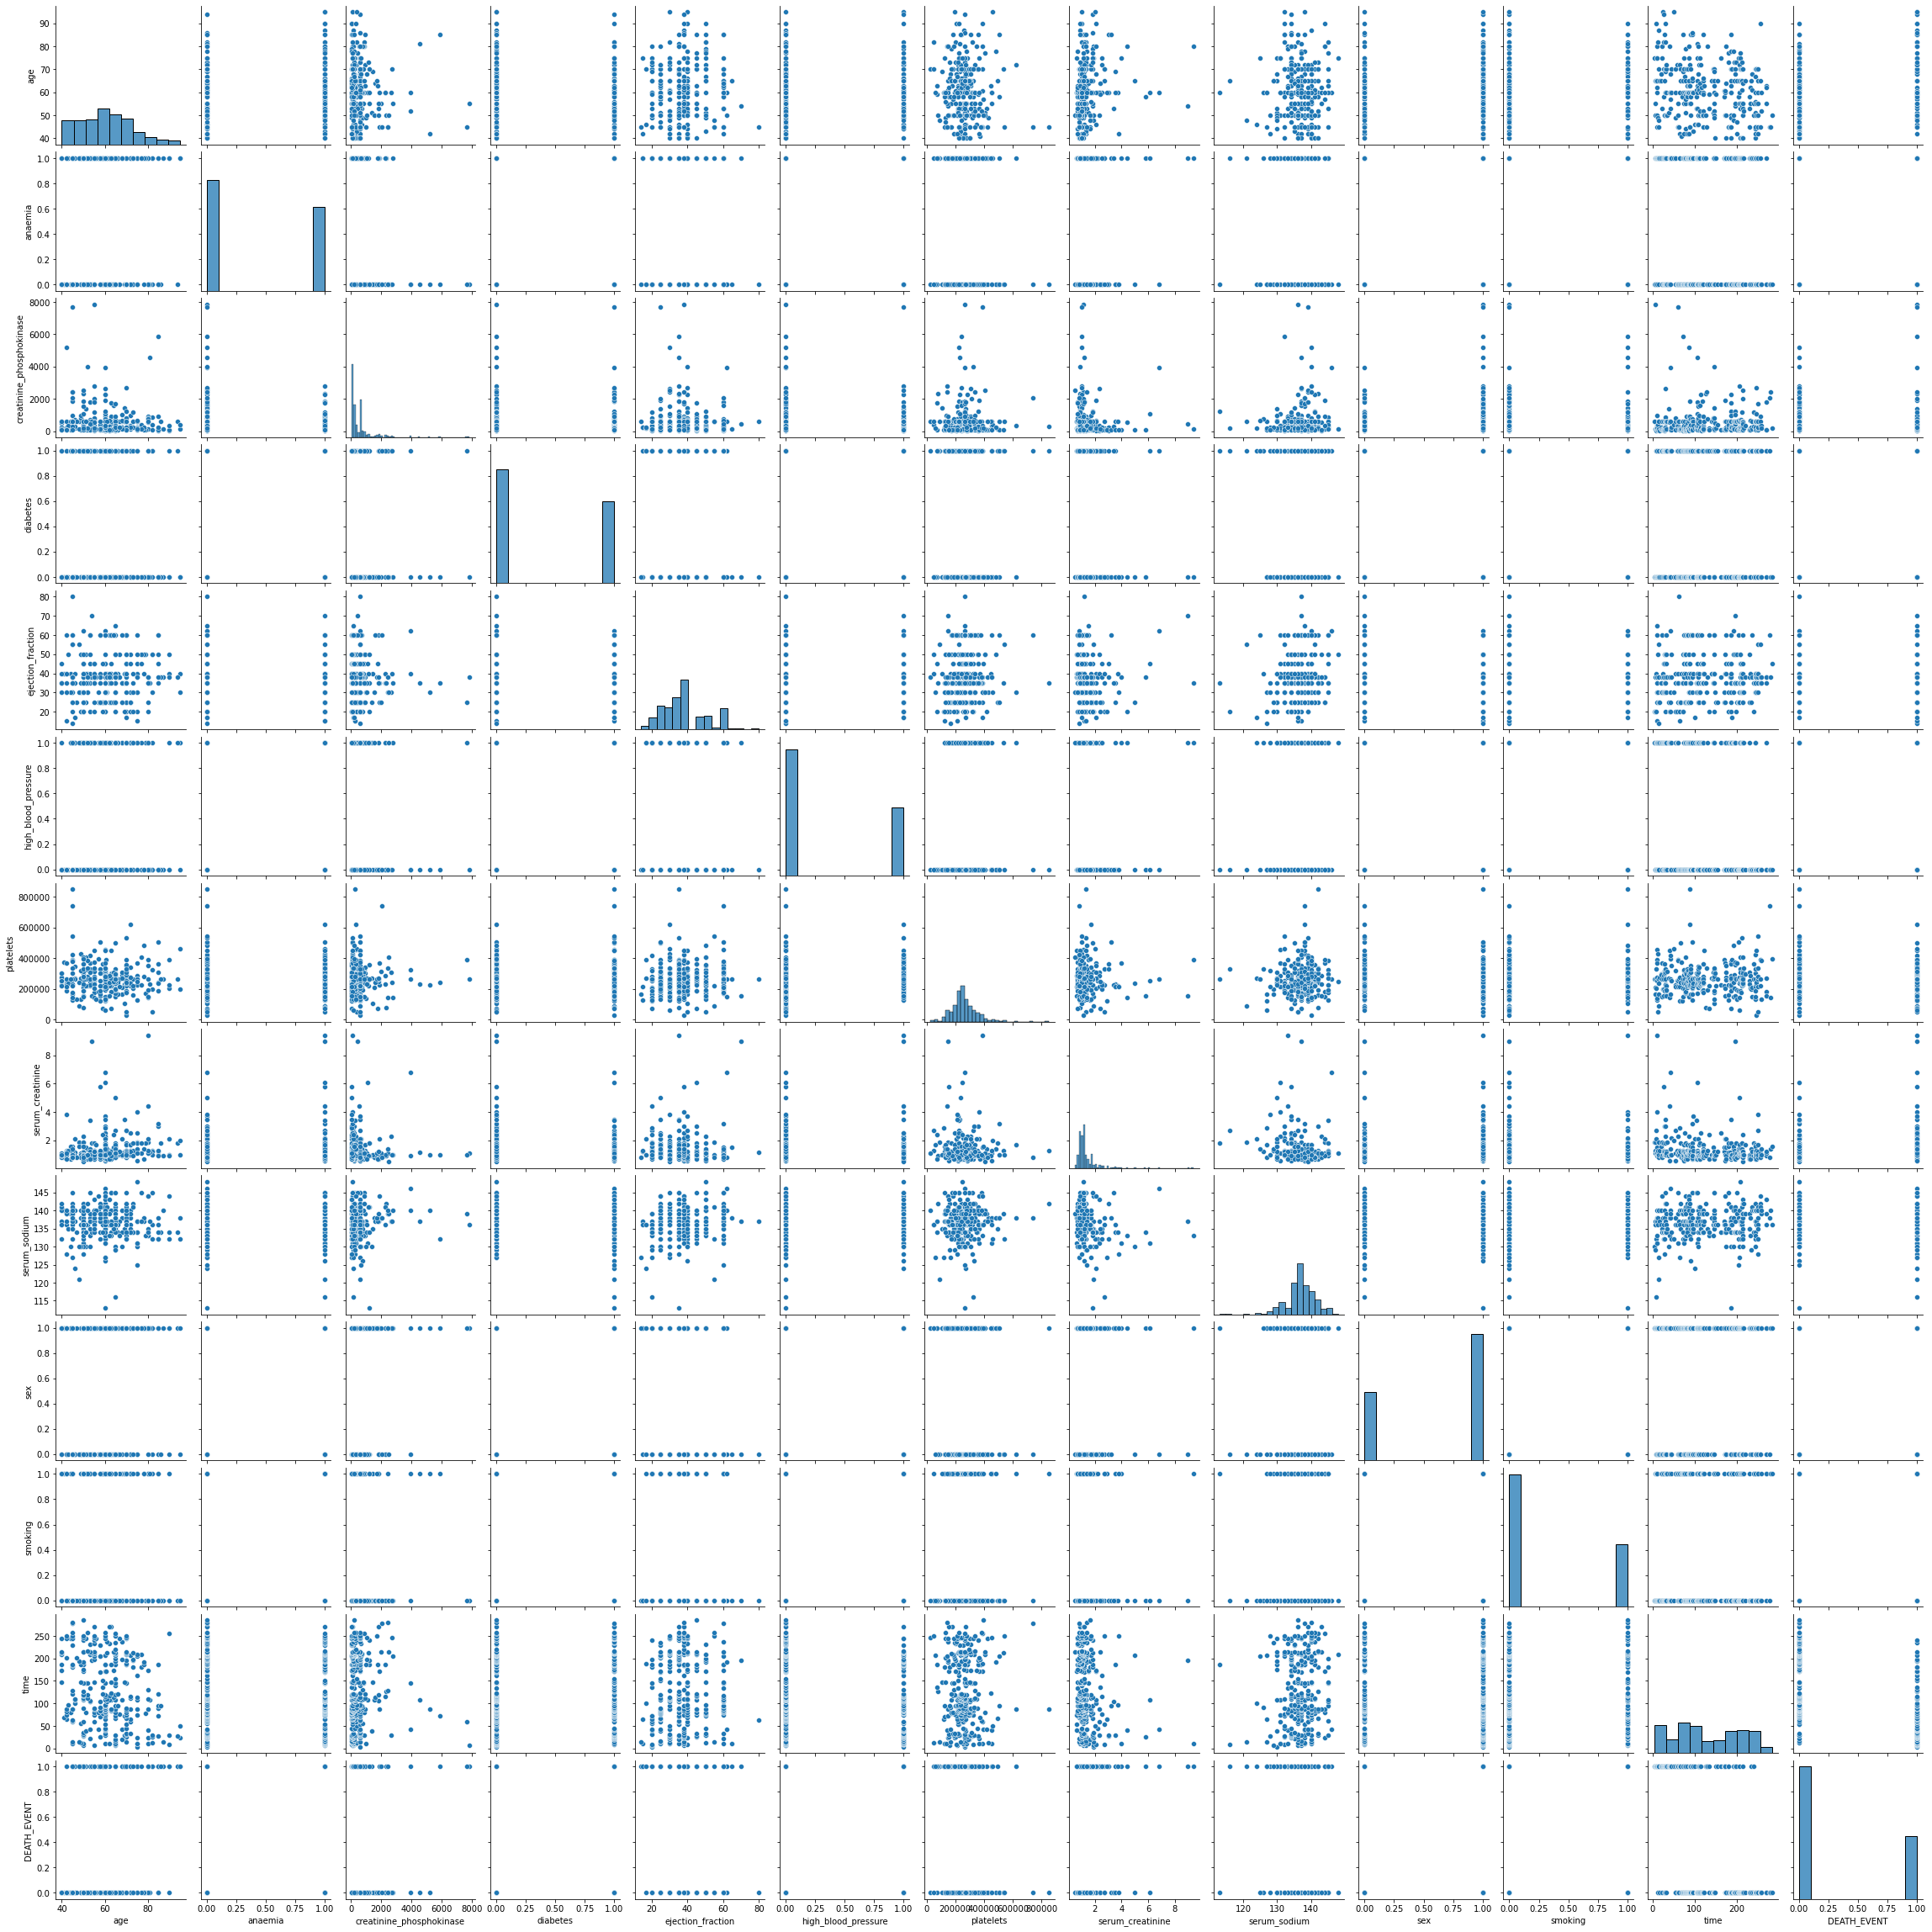

In [197]:
# Getting plotted data using pairplot
sns.pairplot(data)

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

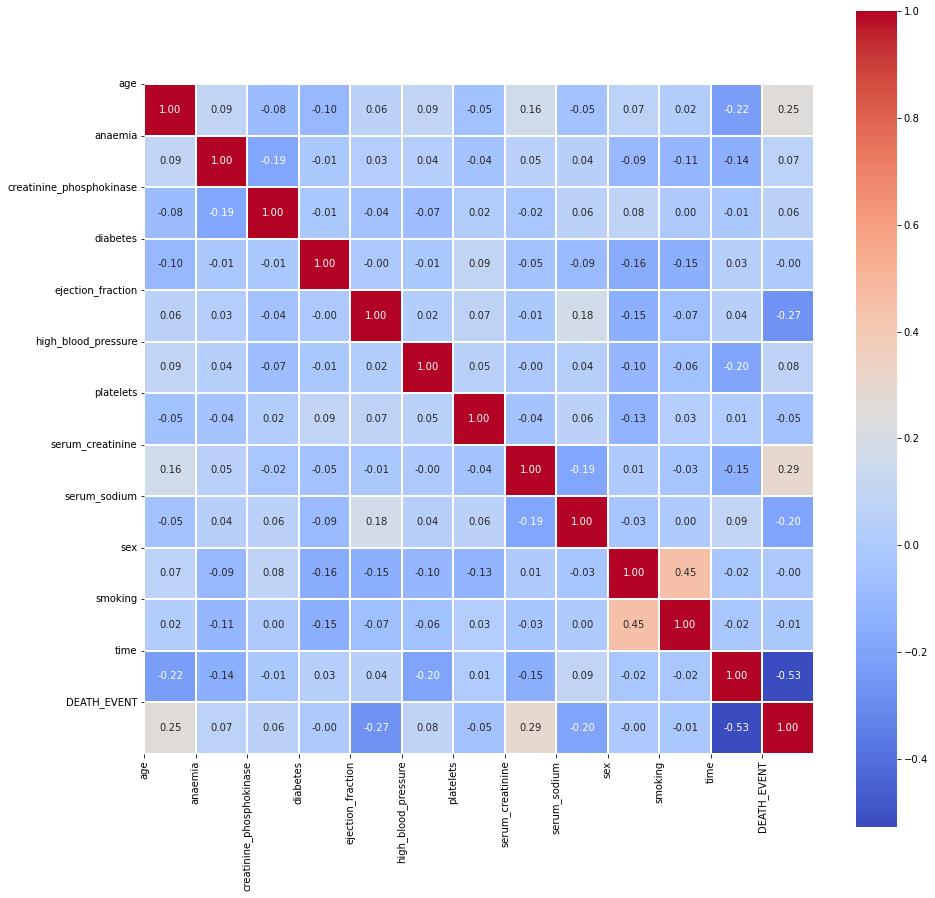

In [198]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.yticks(range(data.shape[1]), data.columns)

data.corr()

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
# break the data into two parts of train and test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [201]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

In [202]:
len(x_train),len(y_train)

(269, 269)

In [203]:
x_test.shape,y_test.shape

((30, 12), (30,))

In [204]:
x_test

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
268  45.0        0                       582         1                 38   
218  68.0        1                      1021         1                 35   
291  60.0        0                       320         0                 35   
65   60.0        0                        68         0                 20   
250  50.0        0                      2522         0                 30   
208  60.0        1                      2281         1                 40   
38   60.0        0                      2656         1                 30   
23   53.0        0                        63         1                 60   
100  65.0        1                       305         0                 25   
29   82.0        0                        70         1                 30   
183  75.0        0                        99         0                 38   
71   58.0        0                       582         1                 35   
39   60.0        0                       235         1                 38   
63   45.0        0                       582         0                 35   
258  45.0        1                        66         1                 25   
289  90.0        1                       337         0                 38   
186  50.0        0                       582         0                 50   
41   50.0        0                       124         1                 30   
239  55.0        1                       180         0                 45   
293  63.0        1                       103         1                 35   
226  58.0        1                        57         0                 25   
89   57.0        1                       115         0                 25   
164  45.0        0                      2442         1                 30   
297  45.0        0                      2413         0                 38   
198  50.0        1                       582         1                 20   
234  53.0        1                       582         0                 45   
33   50.0        1                       159         1                 30   
143  61.0        1                        84         0                 40   
140  80.0        0                       805         0                 38   
278  50.0        1                      1051         1                 30   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
268                    0  302000.00              0.90           140    0   
218                    0  271000.00              1.10           134    1   
291                    0  133000.00              1.40           139    1   
65                     0  119000.00              2.90           127    1   
250                    1  404000.00              0.50           139    0   
208                    0  283000.00              1.00           141    0   
38                     0  305000.00              2.30           137    1   
23                     0  368000.00              0.80           135    1   
100                    0  298000.00              1.10           141    1   
29                     0  200000.00              1.20           132    1   
183                    1  224000.00              2.50           134    1   
71                     0  122000.00              0.90           139    1   
39                     0  329000.00              3.00           142    0   
63                     0  385000.00              1.00           145    1   
258                    0  233000.00              0.80           135    1   
289                    0  390000.00              0.90           144    0   
186                    0  153000.00              0.60           134    0   
41                     1  153000.00              1.20           136    0   
239                    0  263358.03              1.18           137    1   
293                    0  179000.00              0.90           136    1   
226                   

In [205]:
x_test.iloc[:1,:].shape

(1, 12)

In [206]:
# simple linear regression
print("Mean square error",mean_squared_error(y_test, y_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absolute error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, y_predict))
print("R2 score",linear_regressor.score(x_test,y_test)*100)



Mean square error 0.17970250652494435
Mean square root error 0.42391332430692047
Mean absolute error 0.3365939906850415
Coefficient of determination R^2: 0.14
R2 score 14.427377845264589


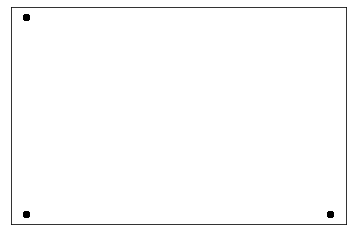

In [207]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")
plt.xticks(())
plt.yticks(())
plt.show()

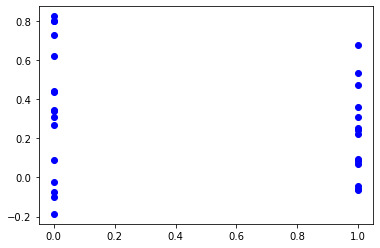

In [208]:
plt.scatter(x_test.iloc[:,1], y_predict, color="blue", linewidth=1)

In [209]:
############################ Different Splitting Strategy ##################################
splits = 5
SEED = 43
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, StratifiedKFold
x_train, x_test, y_train, y_test = train_test_split(x, y )

linear_regressor = LinearRegression()
scores = cross_val_score(linear_regressor, x_train, y_train, scoring='r2', cv=5)
print(scores)

folds = KFold(n_splits = splits, shuffle = True, random_state = SEED)
scores = cross_val_score(linear_regressor, x_train, y_train, scoring='r2', cv=folds)
print(scores)

[0.24459281 0.02558023 0.30631099 0.44267921 0.34076978]
[0.33686218 0.27731868 0.38519645 0.30211118 0.4389753 ]


In [210]:
x

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  
0          0     4  
1          0     6  
2          1     7  
3          0     7  
4          0     8  
..       ...   ...  
294        1   270  
295        0   271  
296        0   278  
297        1   280  
298        1   285  

[299 rows x 12 columns]

In [211]:
############################ PCA #########################################
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

0            1           2          3          4          5   \
0    1641.969406    -0.145905 -126.838452   8.660302 -18.291465   4.534997   
1       1.766518  7279.254974 -118.588597  -2.082109   4.944131   2.322668   
2 -101358.133289  -411.138654 -122.907106  14.552424  -9.070842   5.345130   
3  -53358.143086  -457.772091 -122.790991  23.095645   3.078393  -2.290089   
4   63641.865204  -437.190782 -123.419571  15.833135 -11.488949  18.690441   

         6         7         8         9         10        11  
0 -0.085902 -0.082231  0.085674  0.789417 -0.179464 -0.470699  
1 -0.447896  0.017026 -0.405208 -0.077495 -0.347883 -0.272951  
2 -0.639521 -0.881328  0.184128 -0.014307 -0.452701  0.309505  
3  0.523977 -0.076229 -0.563973 -0.380509 -0.337808 -0.416589  
4  0.261403  0.865609 -0.242880 -0.581867 -0.131295  0.283961

In [212]:
explained_variance = pca.explained_variance_ratio_
list(map(float,explained_variance))



[0.9999009868908149,
 9.835211164194886e-05,
 6.303629058117958e-07,
 1.530556448059895e-08,
 1.3171002559744832e-08,
 1.9372337853448654e-09,
 1.0402848509347252e-10,
 3.6468037237758044e-11,
 2.411049778609993e-11,
 2.3305399072576034e-11,
 2.0469129110496437e-11,
 1.2455216741589909e-11]

In [213]:
x_train.iloc[:,:2]

age  anaemia
103  42.0        0
207  85.0        0
155  60.0        1
213  48.0        1
32   50.0        1
..    ...      ...
274  60.0        1
221  65.0        0
288  65.0        0
233  53.0        1
252  50.0        0

[224 rows x 2 columns]

In [254]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train.iloc[:,:2], y_train)

y_predict = linear_regressor.predict(x_test.iloc[:,:2])

print(mean_squared_error(y_test, y_predict))
print("Mean square root error", math.sqrt(mean_squared_error(y_test, y_predict)))
print("Mean absoulte error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, y_predict))
print("R2 score",linear_regressor.score(x_test.iloc[:,:2],y_test)*100)

0.17828704536402437
Mean square root error 0.42224050654102857
Mean absoulte error 0.39397888560437705
Coefficient of determination R^2: -0.06
R2 score -6.235659975914953


In [215]:
######################### Elasticnet Model #########################
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute, mean, std

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))



Mean MAE: 0.327 (0.052)


Feature: 0, Score: 0.00543
Feature: 1, Score: -0.02679
Feature: 2, Score: 0.00004
Feature: 3, Score: -0.02097
Feature: 4, Score: -0.00987
Feature: 5, Score: -0.01157
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.08039
Feature: 8, Score: -0.01661
Feature: 9, Score: -0.08157
Feature: 10, Score: 0.05750
Feature: 11, Score: -0.00269


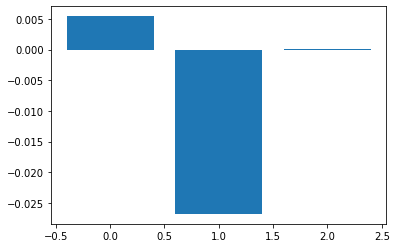

In [216]:
################################## Feature Importance Measurement ############################

# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(3)], importance[:3])
pyplot.show()

In [217]:
data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

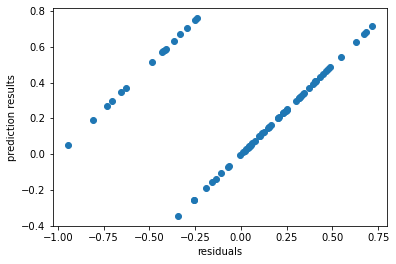

In [218]:
#################### Residual Plot ####################

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_predict = linear_regressor.predict(x_test)

residuals = y_predict - y_test
plt.scatter(residuals,y_predict)
plt.xlabel("residuals")
plt.ylabel("prediction results")

plt.show()



In [219]:
# support vector regression
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(x, y)

SVR(gamma='auto')

In [220]:
svr_predict = svr_regressor.predict(x_test)

In [221]:
print("Mean squared error", mean_squared_error(y_test, svr_predict))
print("Mean square root error",math.sqrt(mean_squared_error(y_test, svr_predict)))
print("Mean absolute error", mean_absolute_error(y_test, y_predict))
print("Coefficient of determination R^2: %.2f" % r2_score(y_test, svr_predict))
print("R2 score",svr_regressor.score(x_test,y_test)*100)

Mean squared error 0.010017546595977112
Mean square root error 0.10008769452823414
Mean absolute error 0.307356138597646
Coefficient of determination R^2: 0.94
R2 score 94.03085809296915


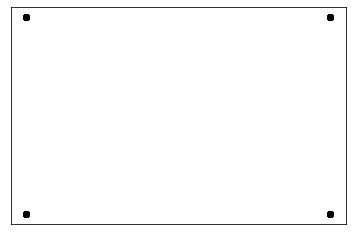

In [222]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")
plt.xticks(())
plt.yticks(())
plt.show()

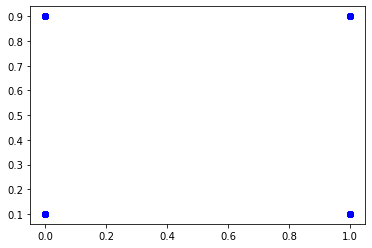

In [223]:
plt.scatter(x_test.iloc[:,1], svr_predict, color="blue", linewidth=1) 

In [224]:
############################## SVR Hyper Parameter Tuning ############################
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr_regressor = SVR()
grid = GridSearchCV(svr_regressor, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.350 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.350 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.350 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.019 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.350 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.300 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.350 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

In [225]:
from sklearn.tree import DecisionTreeRegressor

In [226]:
tree=DecisionTreeRegressor(random_state=11)

In [227]:
x_train

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
103  42.0        0                      5209         0                 30   
207  85.0        0                       212         0                 38   
155  60.0        1                       231         1                 25   
213  48.0        1                       131         1                 30   
32   50.0        1                       249         1                 35   
..    ...      ...                       ...       ...                ...   
274  60.0        1                       257         1                 30   
221  65.0        0                       118         0                 50   
288  65.0        0                       892         1                 35   
233  53.0        1                       707         0                 38   
252  50.0        0                       245         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
103                    0  226000.00               1.0           140    1   
207                    0  186000.00               0.9           136    1   
155                    0  194000.00               1.7           140    1   
213                    1  244000.00               1.6           130    0   
32                     1  319000.00               1.0           128    0   
..                   ...        ...               ...           ...  ...   
274                    0  150000.00               1.0           137    1   
221                    0  194000.00               1.1           145    1   
288                    0  263358.03               1.1           142    0   
233                    0  330000.00               1.4           137    1   
252                    1  274000.00               1.0           133    1   

     smoking  time  
103        1    87  
207        0   187  
155        0   120  
213        0   193  
32         0    28  
..       ...   ...  
274        1   245  
221        1   200  
288        0   256  
233        1   209  
252        0   215  

[224 rows x 12 columns]

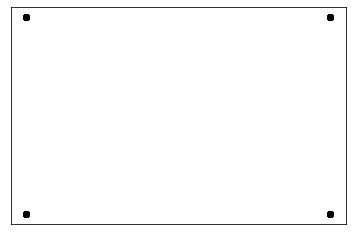

In [229]:
# Plot outputs
plt.scatter(x_test.iloc[:,1], y_test, color="black")
plt.xticks(())
plt.yticks(())
plt.show()

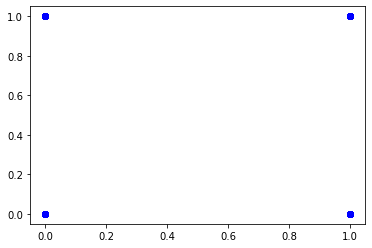

In [230]:
plt.scatter(x_test.iloc[:,1], tree_predict, color="blue", linewidth=1)

In [235]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
LR = LogisticRegression(solver='lbfgs', max_iter=10000) # we adjusted the maximum iteration
#model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [237]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [238]:
predictionsLR= LR.predict(x_test)

 the accuracy of LR is 0.84, respectively
LR model details
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        59
           1       0.67      0.50      0.57        16

    accuracy                           0.84        75
   macro avg       0.77      0.72      0.74        75
weighted avg       0.83      0.84      0.83        75

TN = 55, FP = 4, FN = 8, TP= 8


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


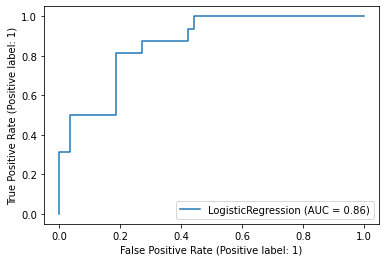

In [239]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
# print accuracy
scoreLR = accuracy_score(y_test, predictionsLR)
#scoreKNN = accuracy_score(y_test, predictionsKNN)
print(f' the accuracy of LR is {scoreLR}, respectively')
# print confusion matrix including precision, recall, f1-score
print("LR model details")
print(classification_report(y_test, predictionsLR))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsLR).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(LR, x_test, y_test) 

In [245]:
log = LogisticRegression(solver = "liblinear")
log_model = log.fit(x_train, y_train)
log_model

LogisticRegression(solver='liblinear')

In [250]:
ypred = log_model.predict(x_test)
accuracy_score(y_test, ypred)

0.84

[[55  4]
 [ 8  8]]


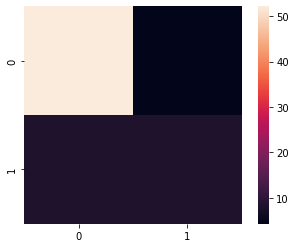

In [251]:
# Visualization Confusion Matrix
conf_mat = confusion_matrix(y_test, ypred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, square = True, robust = True)
plt.show()